In [1]:
import icarogw, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import integrate

Config not imported, automatically decides between Numpy and Cupy
Error in importing cupy


/Users/vgennari/anaconda3/envs/icarogw_env/lib/python3.10/site-packages/ligo/lw/lsctables.py:89: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal
/Users/vgennari/anaconda3/envs/icarogw_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_model(wrapper, x_min = 1, x_max = 80, z_min = 0, z_max = 1, redshift_evolution = False, print_integral = False):

    N = 10000
    N_z = 10
    x  = np.linspace(x_min, x_max, N)
    zx = np.linspace(z_min, z_max, N)
    zy = np.linspace(z_min, z_max, N_z)
    _, z_grid = np.meshgrid(zx, zy)

    colors  = sns.color_palette('RdBu_r', len(z_grid))
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True)

    for zi, z_array in enumerate(z_grid):

        if not redshift_evolution: pdf = wrapper.pdf(x)
        else:                      pdf = wrapper.pdf(x, z_array)
        z = z_array[0]
        ax1.plot(x, pdf + z, color=colors[zi])
        ax2.plot(x, pdf,     color=colors[zi])

        if print_integral: print(integrate.trapezoid(pdf, x))

    x_bounds = (x_min, x_max)
    y_bounds = (1e-5, 1)
    x_label = "mass [M_sun]"
    ax2.set_xlim(x_bounds)
    ax2.set_ylim(y_bounds)
    ax2.set_yscale('log')
    ax1.set_xlabel(x_label)
    ax2.set_xlabel(x_label)
    ax1.set_ylabel("redshift")
    ax2.set_ylabel("PDF")
    plt.tight_layout()
    plt.show()
    plt.close()

# Mass models

### Powerlaw Powerlaw

['alpha_a', 'mmin_a', 'mmax_a', 'alpha_b', 'mmin_b', 'mmax_b', 'mix', 'delta_m_a', 'delta_m_b']


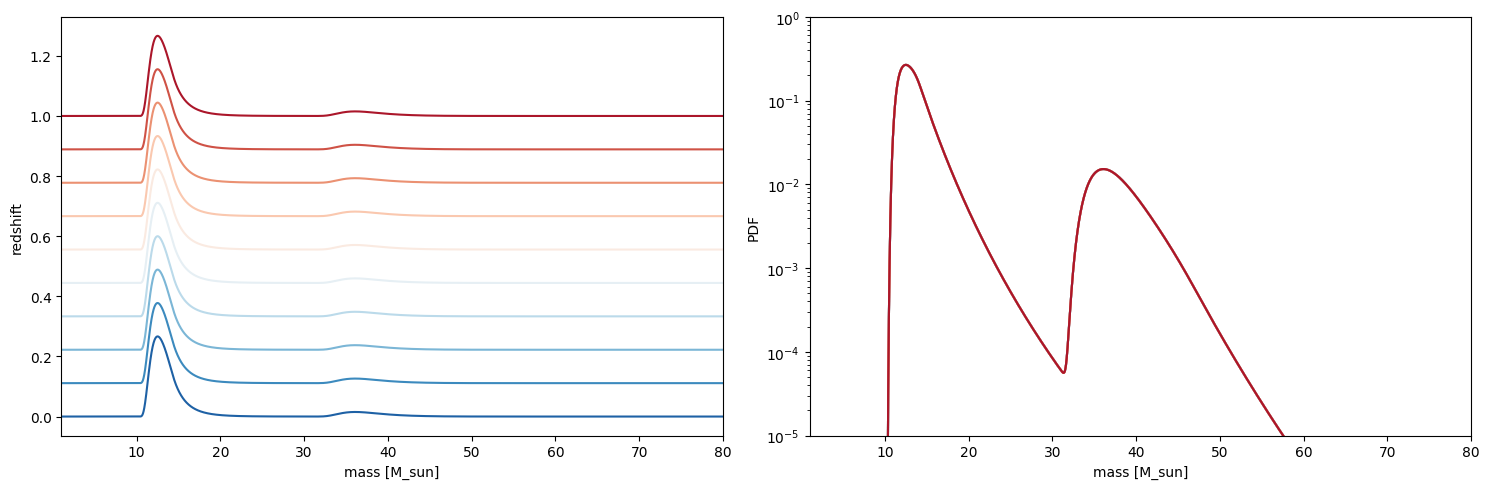

In [20]:
mw = icarogw.wrappers.PowerLaw_PowerLaw()
print(mw.population_parameters)

mw.update(
    alpha_a   = 10.,
    mmin_a    = 10.,
    mmax_a    = 100.,
    delta_m_a = 5.,
    
    alpha_b   = 20.,
    mmin_b    = 30.,
    mmax_b    = 60.,
    delta_m_b = 20.,

    mix       = 0.9)

plot_model(mw)

### Powerlaw Powerlaw Powerlaw

['alpha_a', 'mmin_a', 'mmax_a', 'alpha_b', 'mmin_b', 'mmax_b', 'alpha_c', 'mmin_c', 'mmax_c', 'mix_alpha', 'mix_beta', 'delta_m_a', 'delta_m_b', 'delta_m_c']


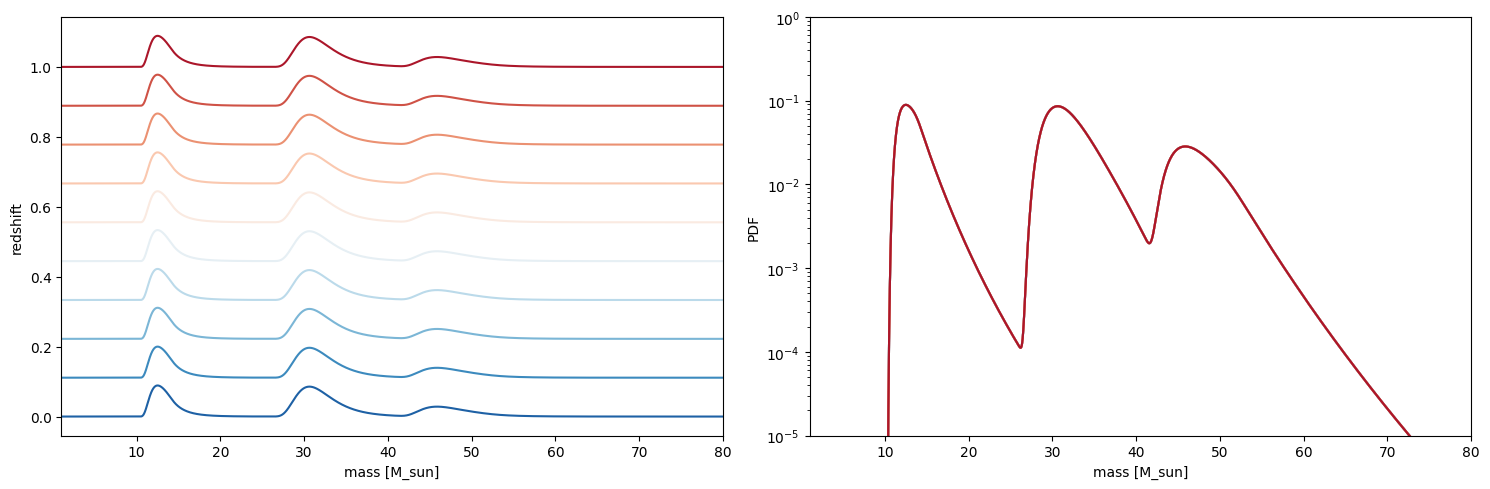

In [21]:
mw = icarogw.wrappers.PowerLaw_PowerLaw_PowerLaw()
print(mw.population_parameters)

mw.update(
    alpha_a   = 10.,
    mmin_a    = 10.,
    mmax_a    = 100.,
    delta_m_a = 5.,

    alpha_b   = 20.,
    mmin_b    = 25.,
    mmax_b    = 60.,
    delta_m_b = 20.,

    alpha_c   = 20.,
    mmin_c    = 40.,
    mmax_c    = 100.,
    delta_m_c = 15.,

    mix_alpha = 0.3,
    mix_beta  = 0.5)

plot_model(mw)

### Powerlaw Powerlaw Gaussian

['alpha_a', 'mmin_a', 'mmax_a', 'alpha_b', 'mmin_b', 'mmax_b', 'mu_g', 'sigma_g', 'mix_alpha', 'mix_beta', 'delta_m_a', 'delta_m_b']


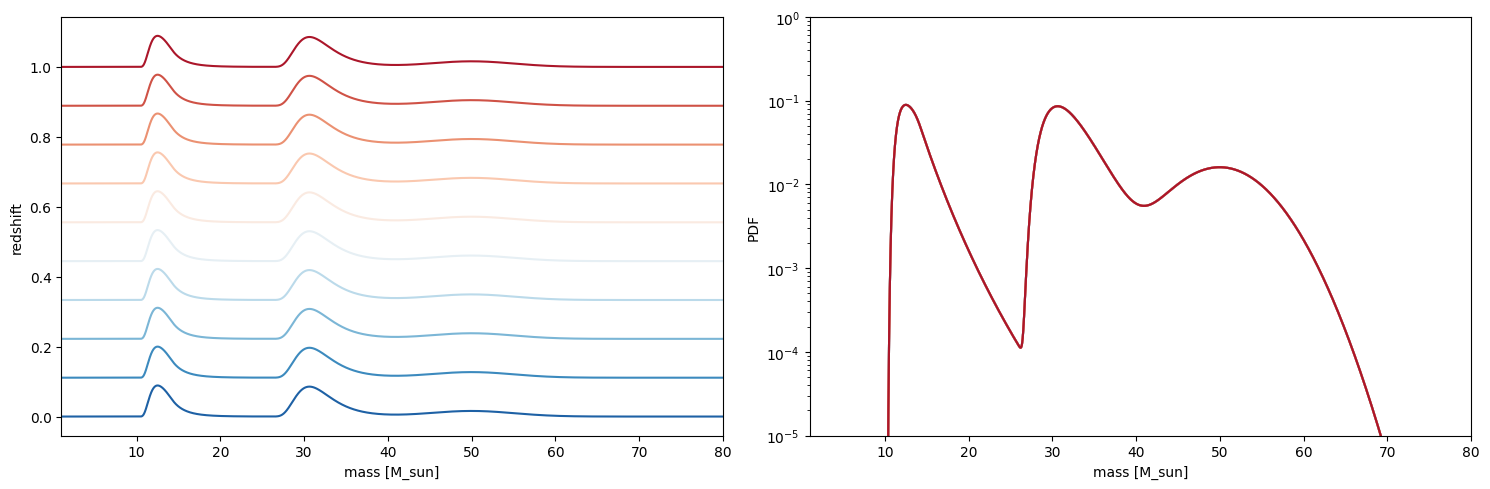

In [22]:
mw = icarogw.wrappers.PowerLaw_PowerLaw_Gaussian()
print(mw.population_parameters)

mw.update(
    alpha_a   = 10.,
    mmin_a    = 10.,
    mmax_a    = 100.,
    delta_m_a = 5.,

    alpha_b   = 20.,
    mmin_b    = 25.,
    mmax_b    = 60.,
    delta_m_b = 20.,

    mu_g      = 50.,
    sigma_g   = 5.,

    mix_alpha = 0.3,
    mix_beta  = 0.5)

plot_model(mw)

### Powerlaw Gaussian(z)

['alpha', 'mmin', 'mmax', 'mu_z0', 'mu_z1', 'sigma_z0', 'sigma_z1', 'mix_z0', 'mix_z1', 'delta_m']


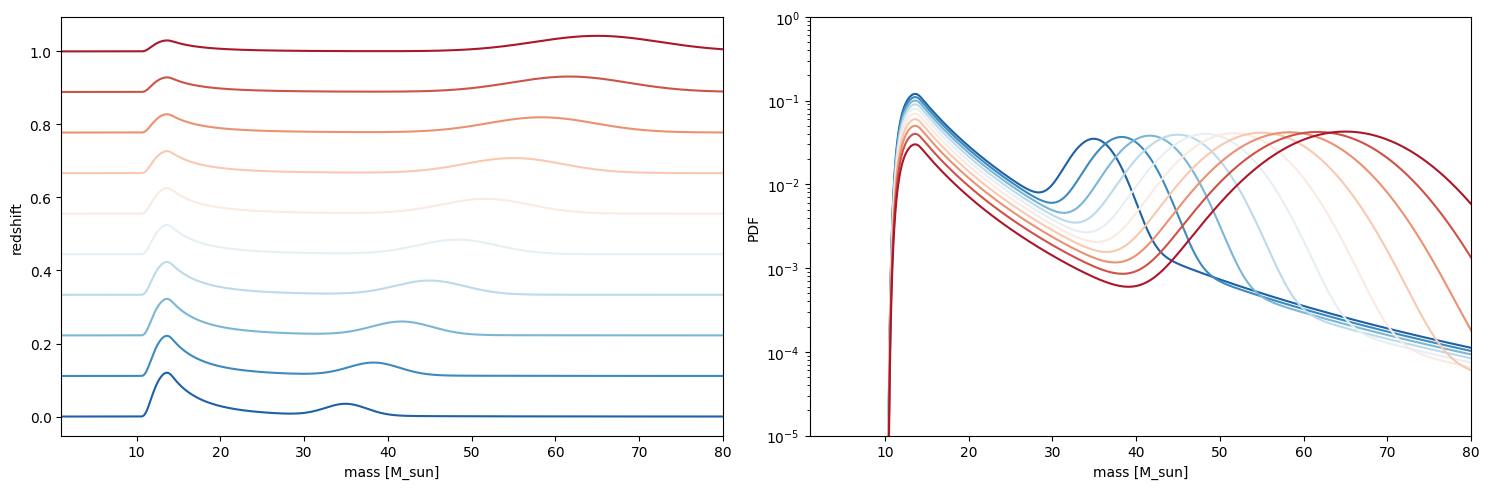

In [23]:
mw = icarogw.wrappers.PowerLaw_GaussianRedshiftLinear(flag_powerlaw_smoothing = 1, redshift_transition = 'linear')
print(mw.population_parameters)

mw.update(
    alpha    = 4.,
    mmin     = 10.,
    mmax     = 150.,
    delta_m  = 5.,

    mu_z0    = 35.,
    mu_z1    = 30.,
    sigma_z0 = 2.5,
    sigma_z1 = 5.,

    mix_z0   = 0.8,
    mix_z1   = 0.2)

plot_model(mw, redshift_evolution = True)

### Powerlaw Gaussian(z) Gaussian(z)

['alpha', 'mmin', 'mmax', 'mu_a_z0', 'mu_a_z1', 'sigma_a_z0', 'sigma_a_z1', 'mu_b_z0', 'mu_b_z1', 'sigma_b_z0', 'sigma_b_z1', 'mix_alpha_z0', 'mix_beta_z0', 'mix_alpha_z1', 'mix_beta_z1', 'delta_m']


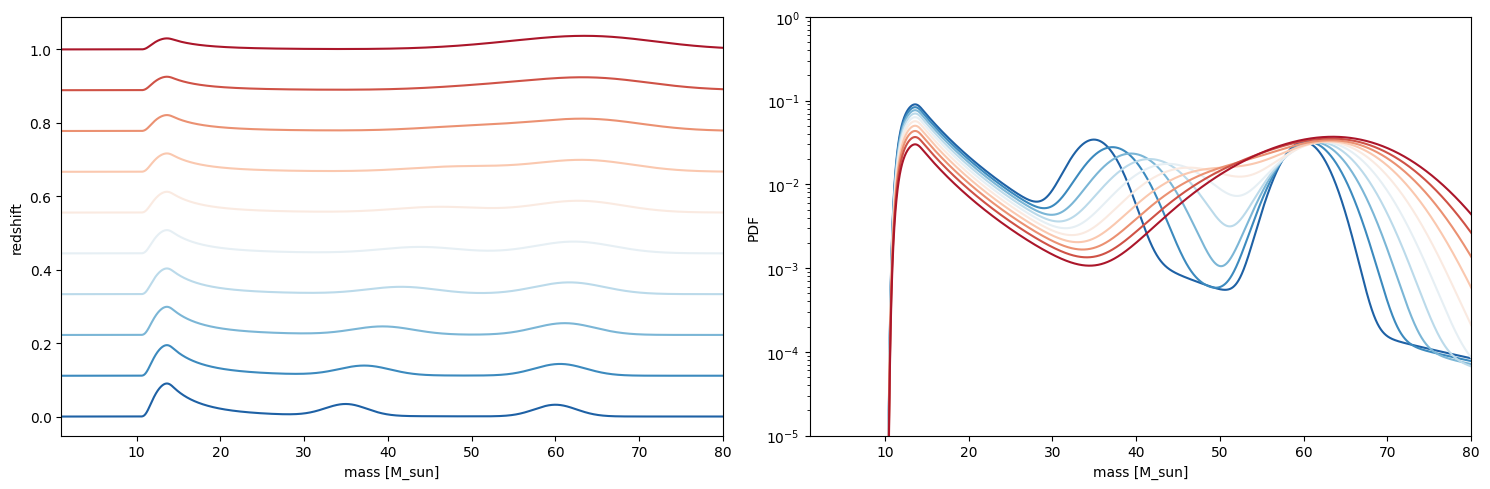

In [24]:
mw = icarogw.wrappers.PowerLaw_GaussianRedshiftLinear_GaussianRedshiftLinear(flag_powerlaw_smoothing = 1, redshift_transition = 'linear')
print(mw.population_parameters)

mw.update(
    alpha        = 4.,
    mmin         = 10.,
    mmax         = 150.,
    delta_m      = 5.,

    mu_a_z0      = 35.,
    mu_a_z1      = 20.,
    sigma_a_z0   = 2.5,
    sigma_a_z1   = 5.,

    mu_b_z0      = 60.,
    mu_b_z1      = 5.,
    sigma_b_z0   = 2.5,
    sigma_b_z1   = 5.,

    mix_alpha_z0 = 0.6,
    mix_alpha_z1 = 0.2,
    mix_beta_z0  = 0.2,
    mix_beta_z1  = 0.2)

plot_model(mw, redshift_evolution = True)

### Powerlaw(z) Gaussian(z)

['alpha_z0', 'alpha_z1', 'mmin_z0', 'mmin_z1', 'mmax_z0', 'mmax_z1', 'mu_z0', 'mu_z1', 'sigma_z0', 'sigma_z1', 'mix_z0', 'mix_z1', 'delta_m']


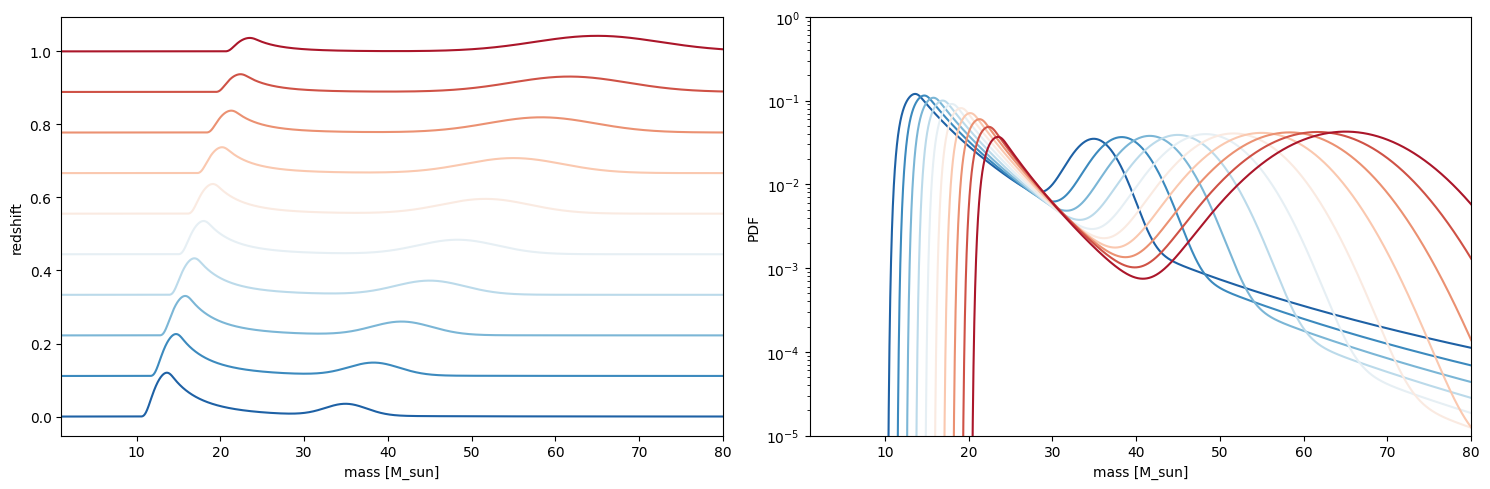

In [25]:
mw = icarogw.wrappers.PowerLawRedshiftLinear_GaussianRedshiftLinear(flag_powerlaw_smoothing = 1, redshift_transition = 'linear')
print(mw.population_parameters)

mw.update(
    alpha_z0 = 4.,
    mmin_z0  = 10.,
    mmax_z0  = 150.,
    alpha_z1 = 4.,
    mmin_z1  = 10.,
    mmax_z1  = 150.,
    delta_m  = 5.,

    mu_z0    = 35.,
    mu_z1    = 30.,
    sigma_z0 = 2.5,
    sigma_z1 = 5.,

    mix_z0   = 0.8,
    mix_z1   = 0.2)

plot_model(mw, redshift_evolution = True)

### Powerlaw(z) Powerlaw(z) Powerlaw(z)

['alpha_a_z0', 'alpha_a_z1', 'mmin_a_z0', 'mmin_a_z1', 'mmax_a_z0', 'mmax_a_z1', 'alpha_b_z0', 'alpha_b_z1', 'mmin_b_z0', 'mmin_b_z1', 'mmax_b_z0', 'mmax_b_z1', 'alpha_c_z0', 'alpha_c_z1', 'mmin_c_z0', 'mmin_c_z1', 'mmax_c_z0', 'mmax_c_z1', 'mix_alpha_z0', 'mix_beta_z0', 'mix_alpha_z1', 'mix_beta_z1', 'delta_m_a', 'delta_m_b', 'delta_m_c']


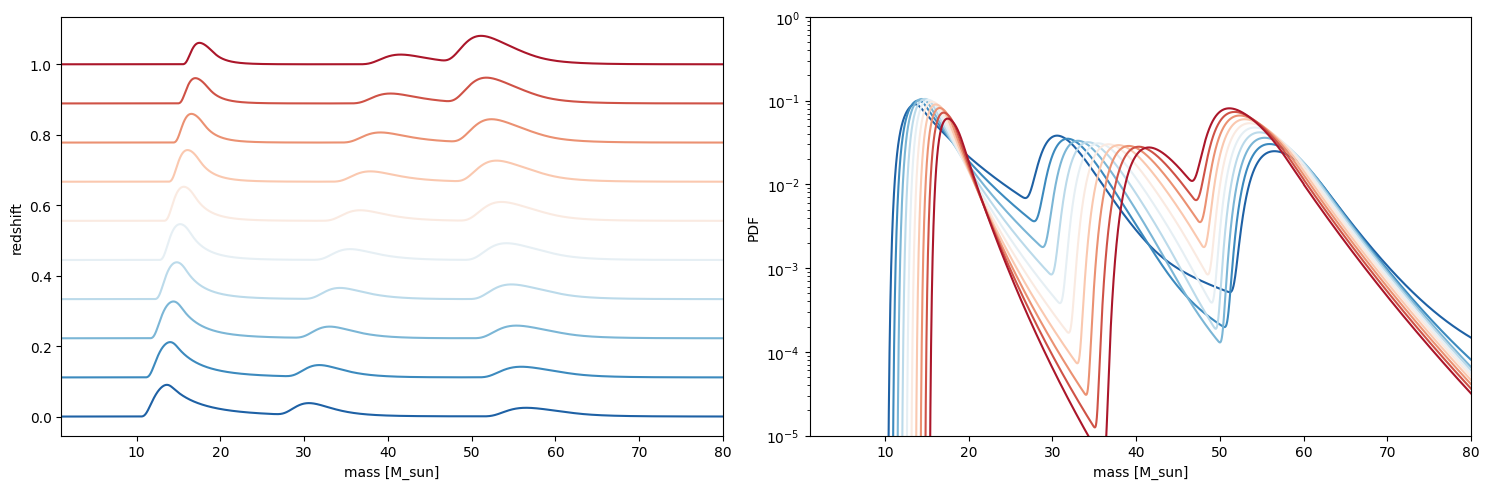

In [26]:
mw = icarogw.wrappers.PowerLawRedshiftLinear_PowerLawRedshiftLinear_PowerLawRedshiftLinear(flag_powerlaw_smoothing = 1, redshift_transition = 'linear')
print(mw.population_parameters)

mw.update(
    alpha_a_z0   = 4.,
    mmin_a_z0    = 10.,
    mmax_a_z0    = 150.,
    alpha_a_z1   = 10.,
    mmin_a_z1    = 5.,
    mmax_a_z1    = 0.,
    delta_m_a    = 5.,

    alpha_b_z0   = 20.,
    mmin_b_z0    = 25.,
    mmax_b_z0    = 60.,
    alpha_b_z1   = 0.,
    mmin_b_z1    = 10.,
    mmax_b_z1    = 0.,
    delta_m_b    = 20.,

    alpha_c_z0   = 20.,
    mmin_c_z0    = 50.,
    mmax_c_z0    = 100.,
    alpha_c_z1   = 5.,
    mmin_c_z1    = -5.,
    mmax_c_z1    = 0.,
    delta_m_c    = 15.,

    mix_alpha_z0 = 0.6,
    mix_alpha_z1 = 0.2,
    mix_beta_z0  = 0.2,
    mix_beta_z1  = 0.2)

plot_model(mw, redshift_evolution = True)

### Powerlaw(z) Powerlaw(z) Gaussian(z)

['alpha_a_z0', 'alpha_a_z1', 'mmin_a_z0', 'mmin_a_z1', 'mmax_a_z0', 'mmax_a_z1', 'alpha_b_z0', 'alpha_b_z1', 'mmin_b_z0', 'mmin_b_z1', 'mmax_b_z0', 'mmax_b_z1', 'mu_z0', 'mu_z1', 'sigma_z0', 'sigma_z1', 'mix_alpha_z0', 'mix_beta_z0', 'mix_alpha_z1', 'mix_beta_z1', 'delta_m_a', 'delta_m_b']


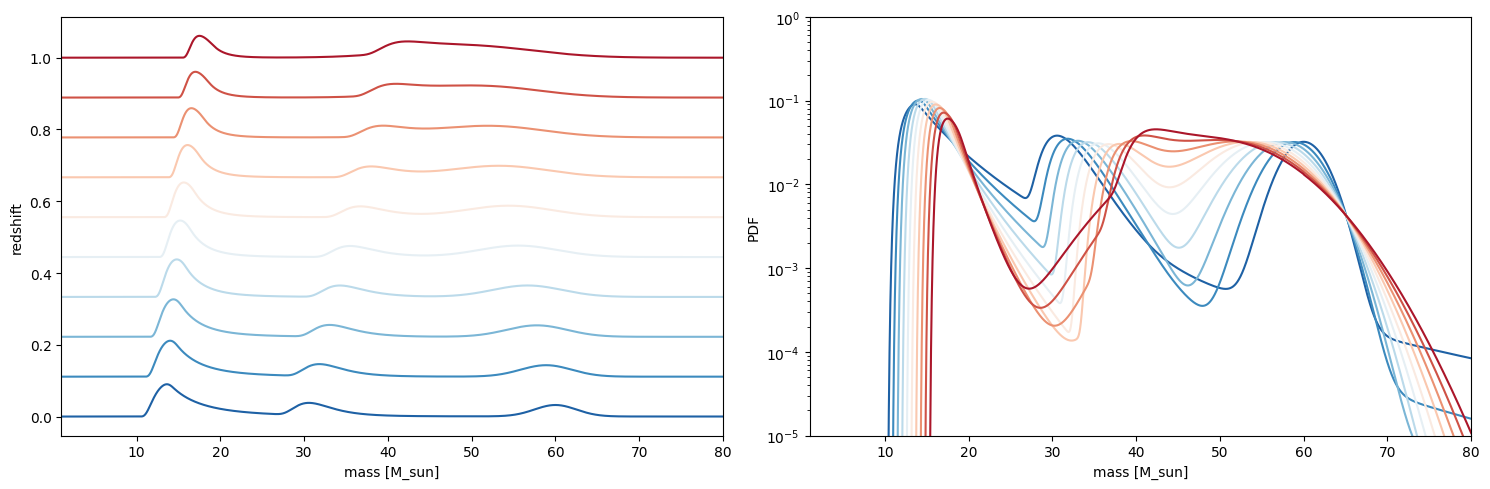

In [27]:
mw = icarogw.wrappers.PowerLawRedshiftLinear_PowerLawRedshiftLinear_GaussianRedshiftLinear(flag_powerlaw_smoothing = 1, redshift_transition = 'linear')
print(mw.population_parameters)

mw.update(
    alpha_a_z0   = 4.,
    mmin_a_z0    = 10.,
    mmax_a_z0    = 150.,
    alpha_a_z1   = 10.,
    mmin_a_z1    = 5.,
    mmax_a_z1    = 0.,
    delta_m_a    = 5.,

    alpha_b_z0   = 20.,
    mmin_b_z0    = 25.,
    mmax_b_z0    = 60.,
    alpha_b_z1   = 0.,
    mmin_b_z1    = 10.,
    mmax_b_z1    = 0.,
    delta_m_b    = 20.,

    mu_z0        = 60.,
    mu_z1        = -10.,
    sigma_z0     = 2.5,
    sigma_z1     = 5.,

    mix_alpha_z0 = 0.6,
    mix_alpha_z1 = 0.2,
    mix_beta_z0  = 0.2,
    mix_beta_z1  = 0.2)

plot_model(mw, redshift_evolution = True)

### Gaussian(z) Gaussian(z)

['mu_a_z0', 'mu_a_z1', 'sigma_a_z0', 'sigma_a_z1', 'mu_b_z0', 'mu_b_z1', 'sigma_b_z0', 'sigma_b_z1', 'mix_z0', 'mmin_g', 'mix_z1']


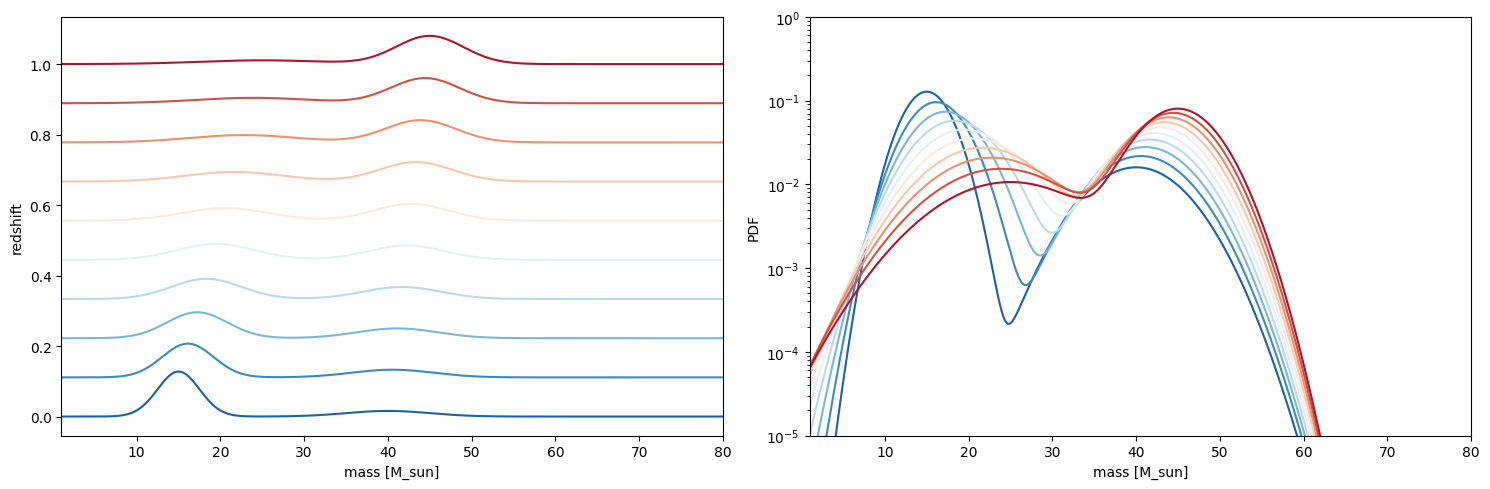

In [28]:
mw = icarogw.wrappers.GaussianRedshiftLinear_GaussianRedshiftLinear(redshift_transition = 'linear')
print(mw.population_parameters)

mw.update(
    mu_a_z0    = 15.,
    mu_a_z1    = 10.,
    sigma_a_z0 = 2.5,
    sigma_a_z1 = 5.,
    mmin_g     = 1.,

    mu_b_z0    = 40.,
    mu_b_z1    = 5.,
    sigma_b_z0 = 5.,
    sigma_b_z1 = -1.,

    mix_z0     = 0.8,
    mix_z1     = 0.2)

plot_model(mw, redshift_evolution = True)

### Gaussian(z) Gaussian(z) Gaussian(z)

['mu_a_z0', 'mu_a_z1', 'sigma_a_z0', 'sigma_a_z1', 'mu_b_z0', 'mu_b_z1', 'sigma_b_z0', 'sigma_b_z1', 'mu_c_z0', 'mu_c_z1', 'sigma_c_z0', 'sigma_c_z1', 'mix_alpha_z0', 'mix_beta_z0', 'mmin_g', 'mix_alpha_z1', 'mix_beta_z1']


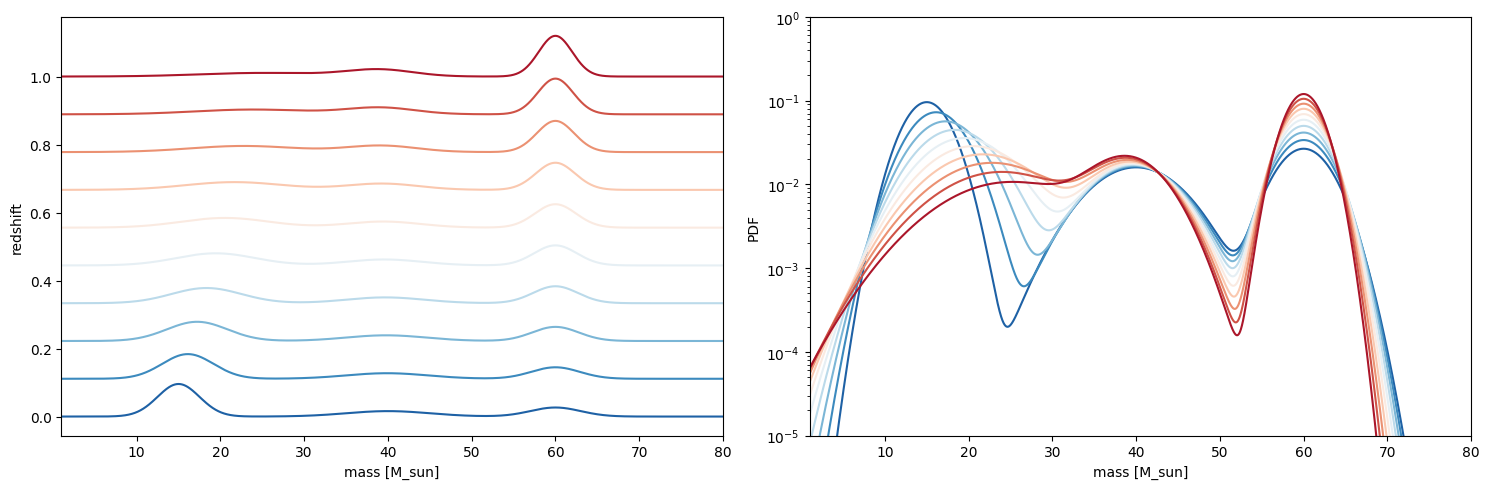

In [29]:
mw = icarogw.wrappers.GaussianRedshiftLinear_GaussianRedshiftLinear_GaussianRedshiftLinear(redshift_transition = 'linear')
print(mw.population_parameters)

mw.update(
    mu_a_z0    = 15.,
    mu_a_z1    = 10.,
    sigma_a_z0 = 2.5,
    sigma_a_z1 = 5.,
    mmin_g     = 1.,

    mu_b_z0    = 40.,
    mu_b_z1    = -1.,
    sigma_b_z0 = 5.,
    sigma_b_z1 = -1.,

    mu_c_z0    = 60.,
    mu_c_z1    = 0.,
    sigma_c_z0 = 3.,
    sigma_c_z1 = -1.,

    mix_alpha_z0 = 0.6,
    mix_alpha_z1 = 0.2,
    mix_beta_z0  = 0.2,
    mix_beta_z1  = 0.2)

plot_model(mw, redshift_evolution = True)

### Gaussian(z) polynomial redshift

['mu_z0', 'mu_z1', 'mu_z2', 'sigma_z0', 'sigma_z1', 'sigma_z2', 'mmin', 'mmax']


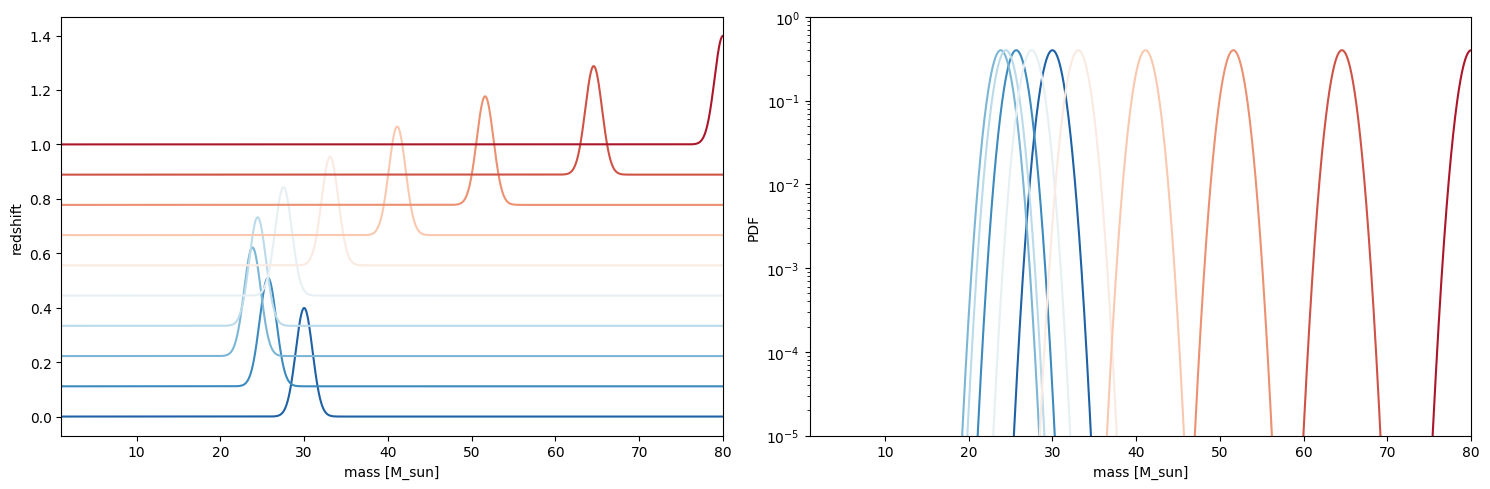

In [30]:
mw = icarogw.wrappers.GaussianEvolving(order = 2)
print(mw.population_parameters)

# Quadratic
mw.update(
    mu_z0    = 30,
    mu_z1    = -50,
    mu_z2    = 100,
    sigma_z0 = 1.,
    sigma_z1 = 0.,
    sigma_z2 = 0.,

    mmin     = 0.,
    mmax     = 100.,
)

plot_model(mw, redshift_evolution = True)

### Uniform

['mmin', 'mmax']


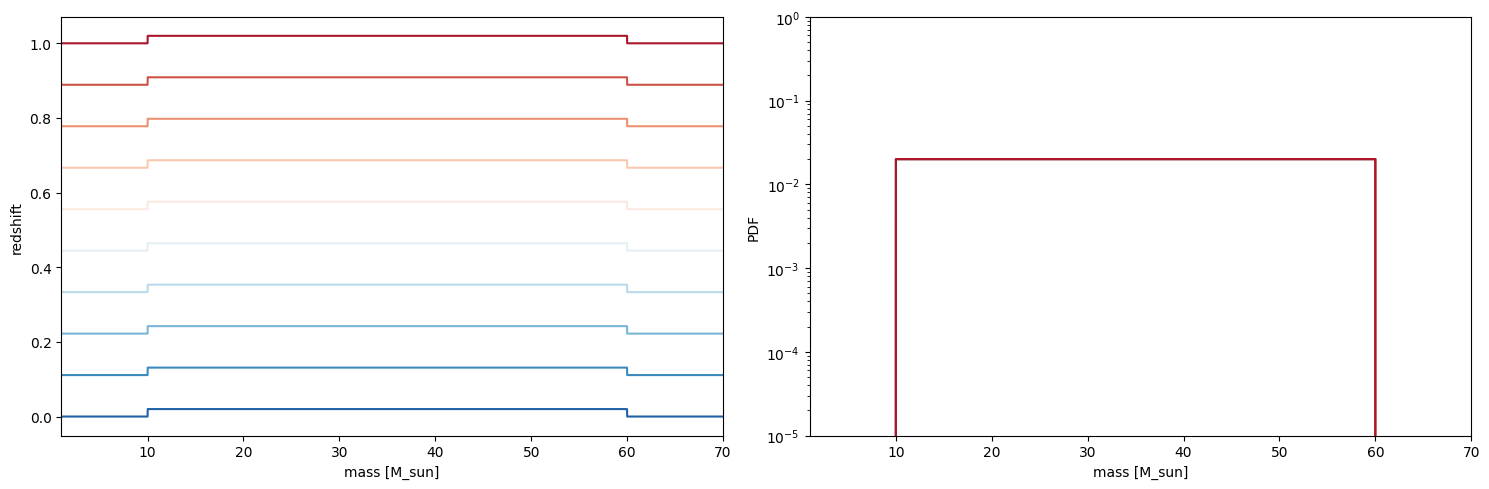

In [31]:
mw = icarogw.wrappers.Uniform()
print(mw.population_parameters)

# Quadratic
mw.update(
    mmin = 10,
    mmax = 60,
)

plot_model(mw, x_max = 70)

### Double Smoothed Powerlaw

['alpha', 'beta', 'mmin', 'mmax', 'm_b', 'delta']


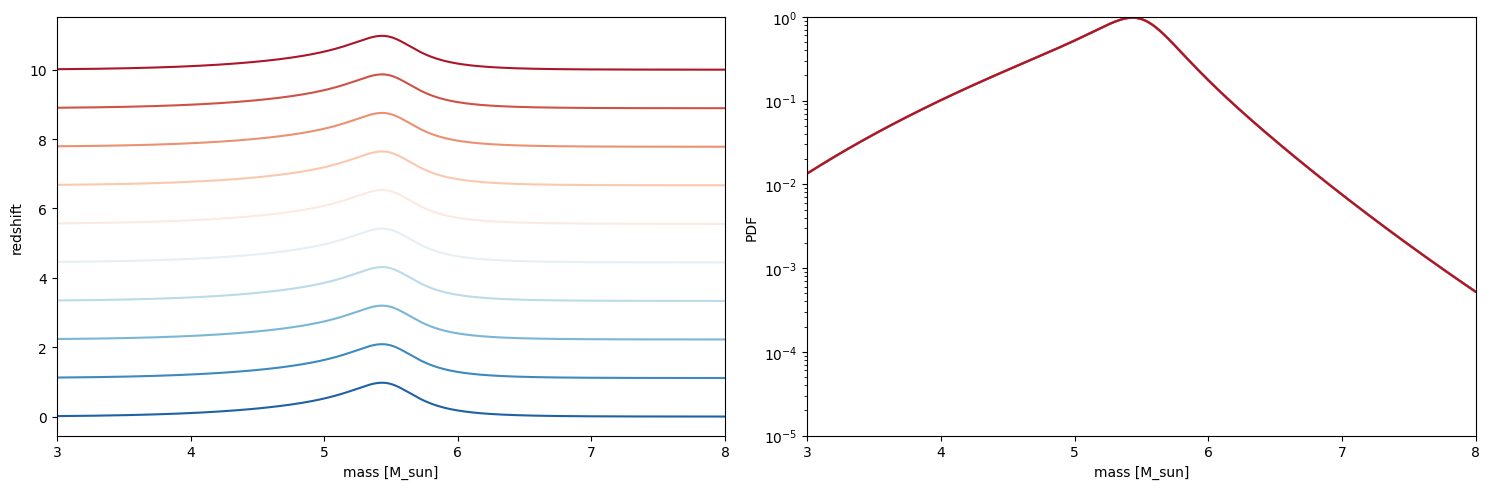

In [4]:
mw = icarogw.wrappers.DoublePowerlaw()
print(mw.population_parameters)

mw.update(
    alpha = 7.,
    beta  = 20.,
    m_b   = 5.5,
    delta = 0.1,
    mmin  = 3.,
    mmax  = 8.,
)

mmin, mmax = 3, 8
zmin, zmax = 0, 10

plot_model(mw, x_min = 3, x_max = 8, z_min = 0, z_max = 10)

### Double Smoothed Powerlaw(z)

['alpha', 'beta', 'mmin', 'mmax', 'delta', 'm_b_z0', 'm_b_z10', 'm_b_zt', 'm_b_delta_zt']


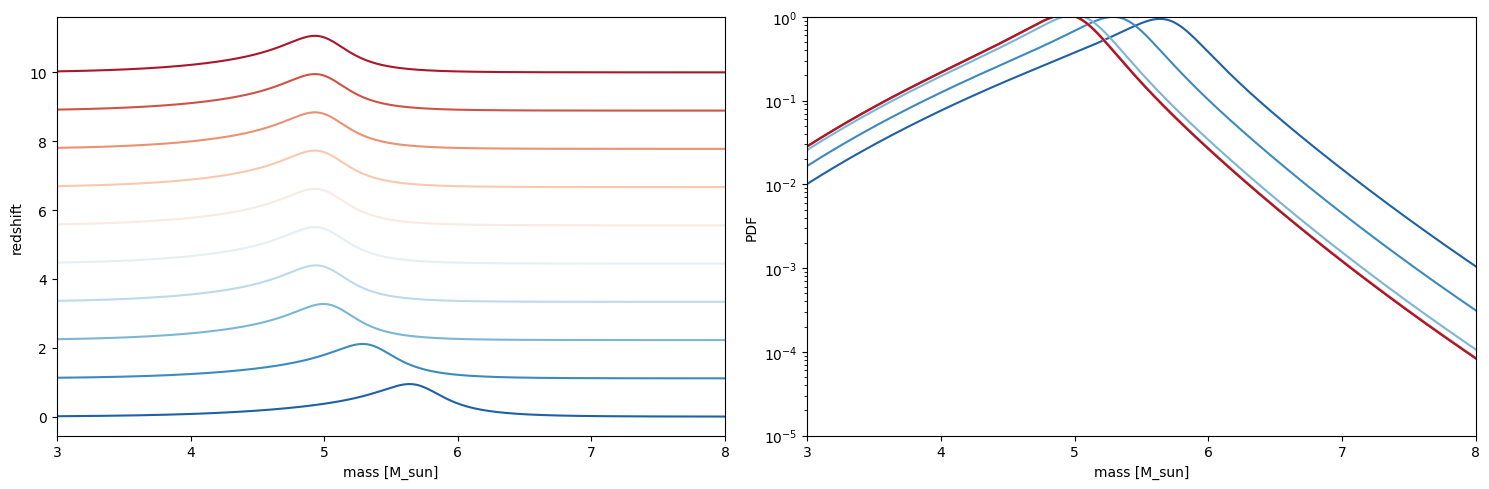

In [5]:
mw = icarogw.wrappers.DoublePowerlawRedshift(redshift_transition = 'sigmoid')
print(mw.population_parameters)

mw.update(
    alpha   = 7.,
    beta    = 20.,
    m_b_z0  = 5.8,
    m_b_z10 = 5.0,
    delta   = 0.1,
    mmin    = 3.,
    mmax    = 8.,

    m_b_zt  = 1.,
    m_b_delta_zt = 0.5,
)

plot_model(mw, x_min = 3, x_max = 8, z_min = 0, z_max = 10, redshift_evolution = True)

### Double Smoothed Powerlaw + Gaussian

['alpha', 'beta', 'mmin', 'mmax', 'm_b', 'delta', 'mu_g', 'sigma_g', 'mix']


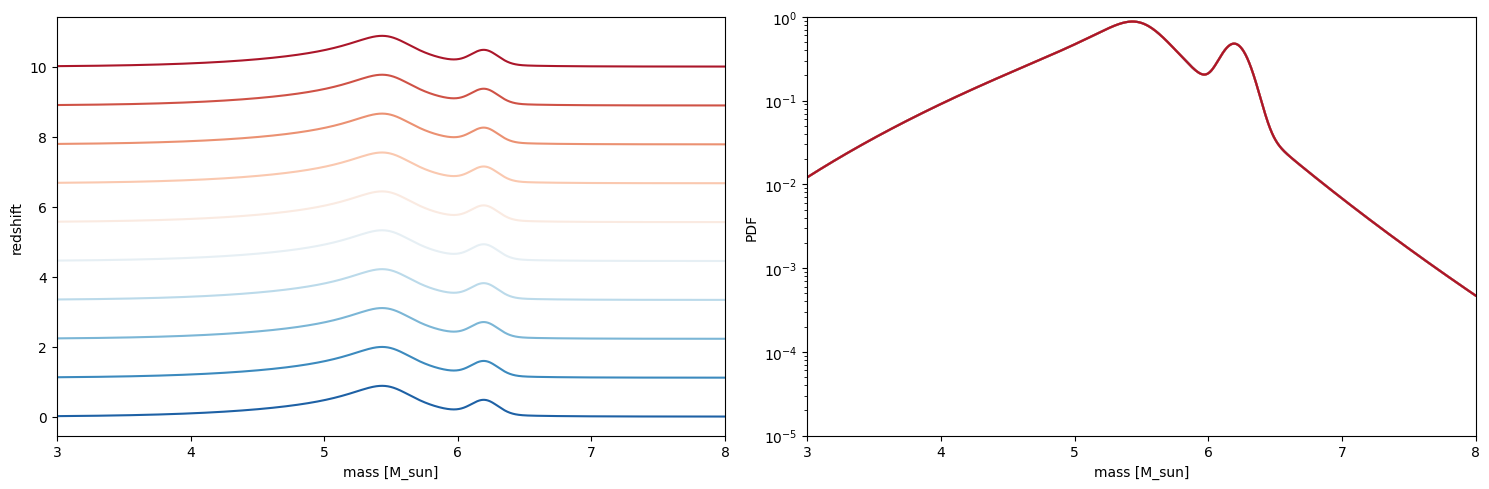

In [15]:
mw = icarogw.wrappers.DoublePowerlaw_Gaussian()
print(mw.population_parameters)

mw.update(
    alpha   = 7.,
    beta    = 20.,
    m_b     = 5.5,
    delta   = 0.1,
    mmin    = 3.,
    mmax    = 8.,
    mu_g    = 6.2,
    sigma_g = 0.1,
    mix     = 0.9,
)

mmin, mmax = 3, 8
zmin, zmax = 0, 10

plot_model(mw, x_min = 3, x_max = 8, z_min = 0, z_max = 10)